In [18]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

In [69]:
ds = xr.open_dataset('/Users/pp/Documents/DE-HAI/Q_ASSIMI_fluxnetdata_timestep.nc', decode_times=True)

/var/folders/9r/97b9zk_j4ys8v5lnksc4l4j00000gq/T/ipykernel_25843/3672695837.py:2: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = ds.indexes['time'].to_datetimeindex();


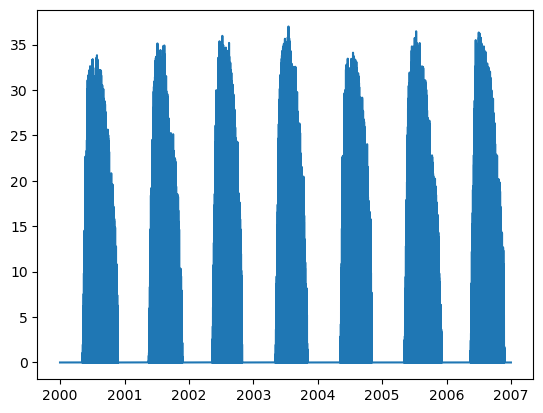

In [70]:
# .to_datetimeindex() converts the NetCDF time index into pandas times index
dates = ds.indexes['time'].to_datetimeindex();
plt.plot(dates, ds['gpp_avg'])
plt.show()

In [71]:
df_mod = ds['gpp_avg'].to_dataframe()
df_mod['beta_ps'] = ds['beta_ps']
df_mod['date'] = pd.to_datetime(dates)
df_mod.reset_index(inplace=True)
df_mod.drop(['time'], axis=1, inplace=True)

In [72]:
df_mod.groupby(['date'])

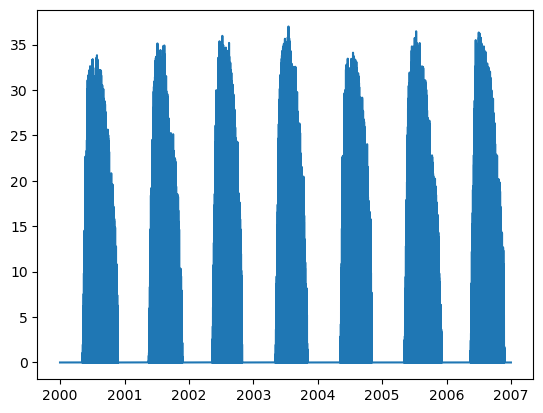

In [73]:
plt.plot(df_mod['date'], df_mod['gpp_avg'])
plt.show()

In [75]:
ds = xr.open_dataset('/Users/pp/Documents/DE-HAI/obs.nc', decode_times=True)
ds

<xarray.Dataset> Size: 28MB
Dimensions:             (longitude: 1, latitude: 1, time: 122736)
Coordinates:
  * longitude           (longitude) float64 8B 10.45
  * latitude            (latitude) float64 8B 51.08
  * time                (time) datetime64[ns] 982kB 2000-01-01T00:30:00 ... 2...
Data variables: (12/28)
    NEE                 (time, latitude, longitude) float64 982kB ...
    NEE_flag            (time, latitude, longitude) float64 982kB ...
    GPP                 (time, latitude, longitude) float64 982kB ...
    GPP_flag            (time, latitude, longitude) float64 982kB ...
    Reco                (time, latitude, longitude) float64 982kB ...
    Reco_flag           (time, latitude, longitude) float64 982kB ...
    ...                  ...
    cdrag               (time, latitude, longitude) float64 982kB ...
    Ci                  (time, latitude, longitude) float64 982kB ...
    Ca                  (time, latitude, longitude) float64 982kB ...
    WUE                 (time, latitude, longitude) float64 982kB ...
    Tcp                 (time, latitude, longitude) float64 982kB ...
    LEcheck             (time, latitude, longitude) float64 982kB ...
Attributes:
    description:  Halfhourly meteorological forcing for the EucFACE MIP. Deri...
    conventions:  CDF
    date:         Fri May  2 16:39:39 2014
    creator:      Soenke Zaehle (szaehle@bgc-jena.mpg.de)

In [41]:

#df_obs = df_obs.reset_index()

In [77]:
#dates = ds.indexes['time'].to_datetimeindex();
df_obs = ds['GPP'].to_dataframe()
df_obs.reset_index(inplace=True)
df_obs['date'] = pd.to_datetime(df_obs['time'])
df_obs.drop(['time'], axis=1, inplace=True)

In [45]:
df_obs

,latitude,longitude,GPP,date
0,51.0793,10.452,-0.132687,2000-01-01 00:30:00
1,51.0793,10.452,0.076432,2000-01-01 01:00:00
2,51.0793,10.452,-0.131226,2000-01-01 01:30:00
3,51.0793,10.452,-0.126098,2000-01-01 02:00:00
4,51.0793,10.452,-0.124629,2000-01-01 02:30:00
...,...,...,...,...
122731,51.0793,10.452,-0.987185,2006-12-31 22:00:00
122732,51.0793,10.452,0.299952,2006-12-31 22:30:00
122733,51.0793,10.452,-0.075597,2006-12-31 23:00:00
122734,51.0793,10.452,0.324922,2006-12-31 23:30:00


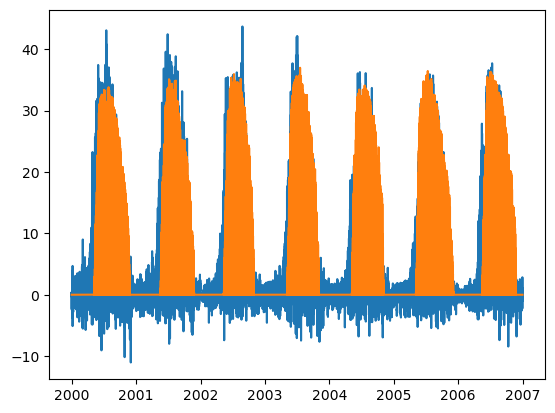

In [78]:
plt.plot(df_obs['date'], df_obs['GPP'])
plt.plot(df_mod['date'], df_mod['gpp_avg'])
plt.show()

ValueError: x and y must have same first dimension, but have shapes (122640,) and (122736,)

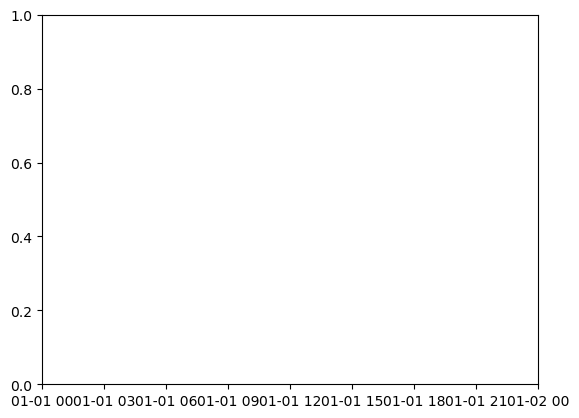

In [79]:
plt.plot(df_mod['date'], df_mod['gpp_avg'] - df_obs['GPP'])

In [80]:
df_both = df_mod.merge(df_obs, on='date')

In [81]:
df_both['']

,gpp_avg,beta_ps,date,latitude,longitude,GPP
0,0.0,0.967956,2000-01-01 00:30:00,51.0793,10.452,-0.132687
1,0.0,0.967956,2000-01-01 01:00:00,51.0793,10.452,0.076432
2,0.0,0.967956,2000-01-01 01:30:00,51.0793,10.452,-0.131226
3,0.0,0.967956,2000-01-01 02:00:00,51.0793,10.452,-0.126098
4,0.0,0.967956,2000-01-01 02:30:00,51.0793,10.452,-0.124629
...,...,...,...,...,...,...
122634,0.0,0.967891,2006-12-31 21:30:00,51.0793,10.452,0.400971
122635,0.0,0.967891,2006-12-31 22:00:00,51.0793,10.452,-0.987185
122636,0.0,0.967891,2006-12-31 22:30:00,51.0793,10.452,0.299952
122637,0.0,0.967891,2006-12-31 23:00:00,51.0793,10.452,-0.075597


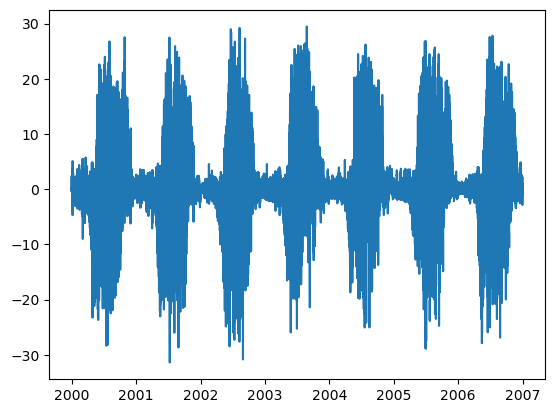

In [82]:
plt.plot(df_both['date'], df_both['gpp_avg'] - df_both['GPP'])

In [92]:
df_both_slice = df_both.groupby(pd.Grouper(key='date', freq='D')).mean()

In [93]:
df_both_slice

,gpp_avg,beta_ps,latitude,longitude,GPP
date,,,,,
2000-01-01,0.0,0.967956,51.0793,10.452,-0.192126
2000-01-02,0.0,0.967956,51.0793,10.452,-0.204670
2000-01-03,0.0,0.967956,51.0793,10.452,-0.235743
2000-01-04,0.0,0.968034,51.0793,10.452,-0.044913
2000-01-05,0.0,0.968226,51.0793,10.452,-0.068854
...,...,...,...,...,...
2006-12-27,0.0,0.967891,51.0793,10.452,-0.251223
2006-12-28,0.0,0.967891,51.0793,10.452,-0.169723
2006-12-29,0.0,0.967891,51.0793,10.452,0.113529


In [94]:
df_both_slice.reset_index(inplace=True)

In [95]:
df_both_slice

,date,gpp_avg,beta_ps,latitude,longitude,GPP
0,2000-01-01,0.0,0.967956,51.0793,10.452,-0.192126
1,2000-01-02,0.0,0.967956,51.0793,10.452,-0.204670
2,2000-01-03,0.0,0.967956,51.0793,10.452,-0.235743
3,2000-01-04,0.0,0.968034,51.0793,10.452,-0.044913
4,2000-01-05,0.0,0.968226,51.0793,10.452,-0.068854
...,...,...,...,...,...,...
2552,2006-12-27,0.0,0.967891,51.0793,10.452,-0.251223
2553,2006-12-28,0.0,0.967891,51.0793,10.452,-0.169723
2554,2006-12-29,0.0,0.967891,51.0793,10.452,0.113529
2555,2006-12-30,0.0,0.967891,51.0793,10.452,-0.386510


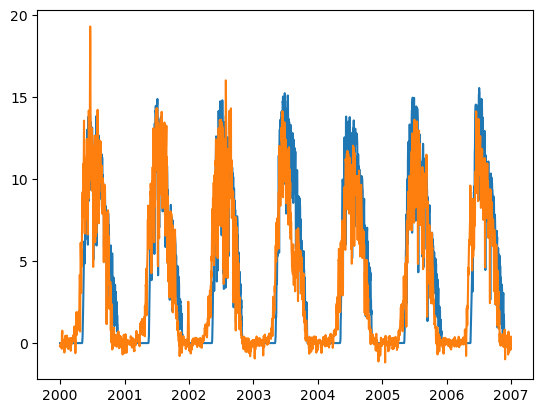

In [97]:
plt.plot(df_both_slice['date'], df_both_slice['gpp_avg'])
plt.plot(df_both_slice['date'], df_both_slice['GPP'])
plt.show()

In [98]:
import numpy as np

In [106]:
np.sqrt(np.sum((df_both_slice['gpp_avg'] - df_both_slice['GPP']) ** 2)/ df_both_slice['gpp_avg'].shape[0])

2.3831232848272963

In [112]:
def rmse(y_mod, y_obs):
    return np.sqrt(np.sum((y_mod - y_obs) ** 2)/ y_obs.shape[0])

In [113]:
rmse(df_both_slice['gpp_avg'], df_both_slice['GPP'])

2.3831232848272963

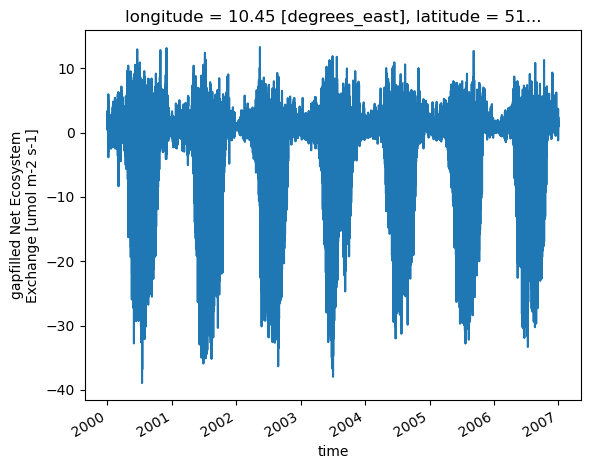

In [27]:
ds['NEE'].plot()

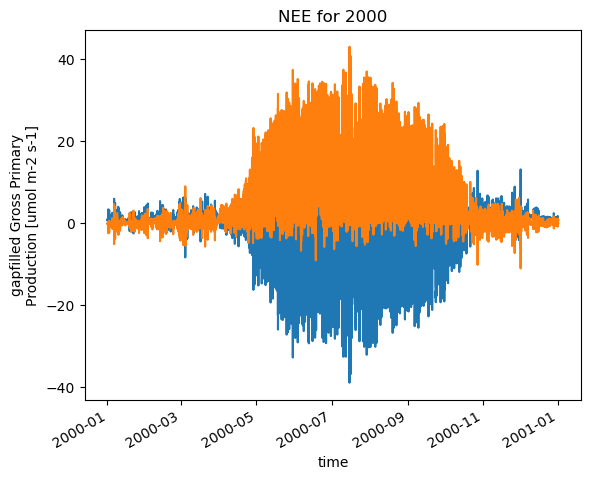

In [28]:
# Plot NEE for a particular day
desired_date= '2000'
data_for_date=ds.sel(time=desired_date)

data_for_date['NEE'].plot()
data_for_date['GPP'].plot()

plt.title(f'NEE for {desired_date}')

plt.show()

In [29]:
# Load as different names
quincy_q = xr.open_dataset('/Users/eamon/Desktop/MP_Python/Hainich Data/Q_ASSIMI_fluxnetdata_timestep.nc', decode_times=True)
hainich = xr.open_dataset('/Users/eamon/Desktop/MP_Python/Hainich Data/obs.nc', decode_times=True)

quincy_q

<xarray.Dataset>
Dimensions:      (time: 122640, q_canopy_layer: 10)
Coordinates:
  * time         (time) object 2000-01-01 00:00:00 ... 2006-12-31 23:30:00
Dimensions without coordinates: q_canopy_layer
Data variables:
    jmax         (time, q_canopy_layer) float32 ...
    vcmax        (time, q_canopy_layer) float32 ...
    chlfl_yield  (time, q_canopy_layer) float32 ...
    gpp_avg      (time) float32 ...
    gpp_c13_avg  (time) float32 ...
    gpp_c14_avg  (time) float32 ...
    gc_avg       (time) float32 ...
    beta_gs      (time) float32 ...
    beta_ps      (time) float32 ...
Attributes:
    model_config:   land
    branch:         feature/plant-hydraulics-physics
    commit:         af471c31
    commit_status:  modified
    run_by:         ppapastefanou
    date:           Wed May  8 15:06:21 2024

In [30]:
hainich

<xarray.Dataset>
Dimensions:             (longitude: 1, latitude: 1, time: 122736)
Coordinates:
  * longitude           (longitude) float64 10.45
  * latitude            (latitude) float64 51.08
  * time                (time) datetime64[ns] 2000-01-01T00:30:00 ... 2007-01-01
Data variables: (12/28)
    NEE                 (time, latitude, longitude) float64 ...
    NEE_flag            (time, latitude, longitude) float64 ...
    GPP                 (time, latitude, longitude) float64 ...
    GPP_flag            (time, latitude, longitude) float64 ...
    Reco                (time, latitude, longitude) float64 ...
    Reco_flag           (time, latitude, longitude) float64 ...
    ...                  ...
    cdrag               (time, latitude, longitude) float64 ...
    Ci                  (time, latitude, longitude) float64 ...
    Ca                  (time, latitude, longitude) float64 ...
    WUE                 (time, latitude, longitude) float64 ...
    Tcp                 (time, latitude, longitude) float64 ...
    LEcheck             (time, latitude, longitude) float64 ...
Attributes:
    description:  Halfhourly meteorological forcing for the EucFACE MIP. Deri...
    conventions:  CDF
    date:         Fri May  2 16:39:39 2014
    creator:      Soenke Zaehle (szaehle@bgc-jena.mpg.de)

In [31]:
# Try to plot quincy and hainich data against each other
desired_date= '2000'
quincy_at_date=quincy_q.sel(time=desired_date)
hainich_at_date=hainich.sel(time=desired_date)

In [33]:
time_quincy = quincy_at_date.indexes['time'].to_datetimeindex();
time_hainich = hainich_at_date.indexes['time']

/var/folders/qb/z7n8fnps0s712vprt0jd6hkw0000gn/T/ipykernel_10328/2514796725.py:1: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  time_quincy = quincy_at_date.indexes['time'].to_datetimeindex();


ValueError: x and y can be no greater than 2D, but have shapes (17567,) and (17567, 1, 1)

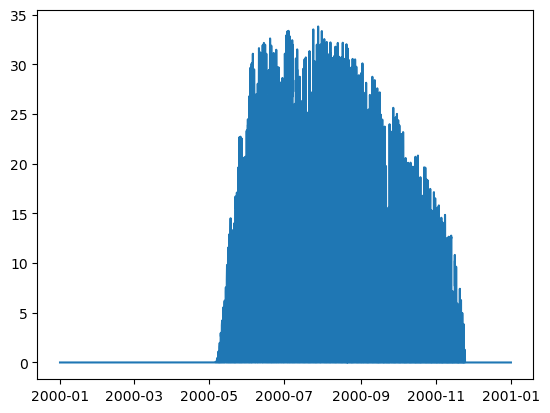

In [39]:
plt.plot(time_quincy, quincy_at_date['gpp_avg'])
plt.plot(time_hainich, hainich_at_date['GPP'])
plt.show()